In [1]:
import sys
sys.path.insert(1, '../src/magpies/')
from magpies import *
from atmos import *
import numpy as np
from math import *
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.16.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Radius and mass of neutron star
Rns = 12  ## km
Mns = 1.4 ## M_solar
Tb = pow(10, 7.1730)  ## K
Bp = 1e11 ## G

In [3]:
g14c = g14 (Rns, Mns) ## computing the free fall acceleration
atm_iron_2003 = NS_atmosphere ('Potekhin_2003_iron', g14c, Tb, Bp)
atm_iron_2003.describe ()

Surface temperatures for magnetised envelope of NS
Following fit from Potekhin, Yakovlev, Chabrier & Gnedin (2003) for iron envelope
The Astrophysical Journal, Volume 594, Issue 1, pp. 404-418  2003ApJ...594..404P
Same fits are provided in Beznogov, Potekhin & Yakovlev (2021) for iron envelope
Physics Reports, Volume 919, p. 1-68 2021PhR...919....1B


In [4]:
Tm = Tmap (usage='NS_atm', ns_atm=atm_iron_2003)

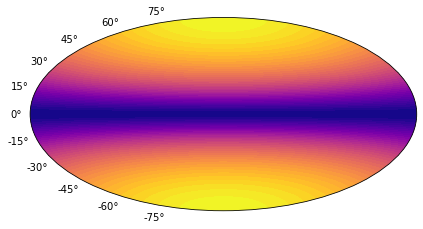

In [5]:
Tm.plot_Ts()


In [6]:
L    = compute_L(Tm, Rns)
Teff = compute_Teff(Tm, Rns)
print ('L = ', L, ' Teff = ', Teff)

L =  6.656385831516438e+30  Teff =  283805.4742034619


In [7]:
eph = np.logspace (-1.2, 1.62, 142) ## keV

spect, visib = spectra_pole (Tm, Rns, Mns, eph)

../src/magpies/magpies.py:544: RuntimeWarning: overflow encountered in exp
  sp_red = sp_red +  Df * 15.0 * sigma_SB / ( pow(pi, 5) * pow(kB, 4)) * np.sin(Tmap.theta[j]) * np.cos(al)  * np.power(eph, 3) / (np.exp(eph / kB / Ts_inf[i,j]) - 1.0) * dtheta * dphi
../src/magpies/magpies.py:220: RuntimeWarning: divide by zero encountered in log
  x = (1.0 - u)*y*(1.0 + u*u*y*y/112.0 - e/100.0*u*y*(np.log(1-y/2.0) + y/2))
../src/magpies/magpies.py:222: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(res)


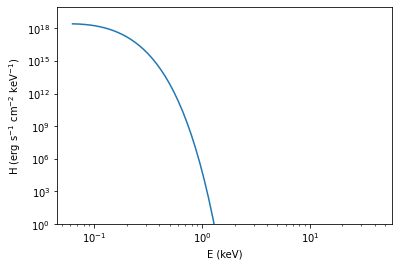

In [8]:
plt.plot (eph, spect)
plt.xlabel('E (keV)')
plt.ylabel(r'H (erg s$^{-1}$ cm$^{-2}$ keV$^{-1}$)')
plt.ylim([1, 1e20])
plt.xscale('log')
plt.yscale('log')

plt.savefig('polar_spectra.png')

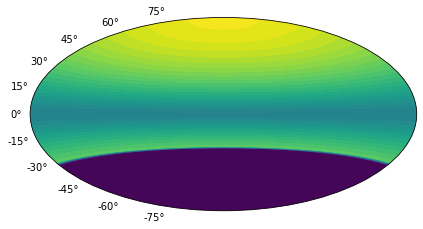

In [9]:
frame = plt.subplot(111, projection='aitoff')
bc = plt.contourf (Tm.phi-pi, -(Tm.theta-pi/2), visib.T, 40)
frame.axes.xaxis.set_ticklabels([])
plt.tight_layout()
plt.savefig ('visib.png')

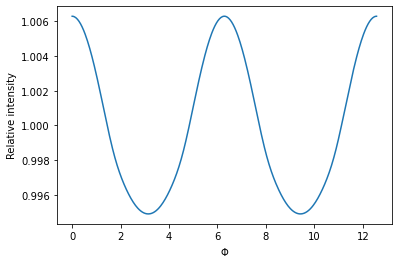

In [11]:
phases = np.linspace (0, 4*pi, 400)
intens = lightcurve (Tm, Rns, Mns, phases, 0, pi/4)

intens_rel = np.asarray(intens) / np.mean(intens) 

plt.plot (phases, intens_rel)
plt.xlabel(r'$\Phi$')
plt.ylabel('Relative intensity')
plt.savefig('lightcurve.png')